# Computer Vision Course 2024
## Assignment 1


### Loading images and colorspaces

In [3]:
import cv2  # OpenCV
from matplotlib import pyplot as plt # matplotlib to display images
import numpy as np # numpy
import urllib.request

def url2img(url):
  req = urllib.request.urlopen(url)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  return cv2.imdecode(arr, -1)

img = url2img("https://github.com/bozeklab/ComputerVision_SS24/blob/main/resources/assignment_1/flowers.jpg?raw=true")

Usually you could use `cv2.imshow(img)` to display the loaded image but since there is a bug in jupyter, we will use matplotlib to display it.
With `vmin` and `vmax` we add the min. and max. pixel value  as range information since matplotlib will by default use the value range of the input data to define the colormap.

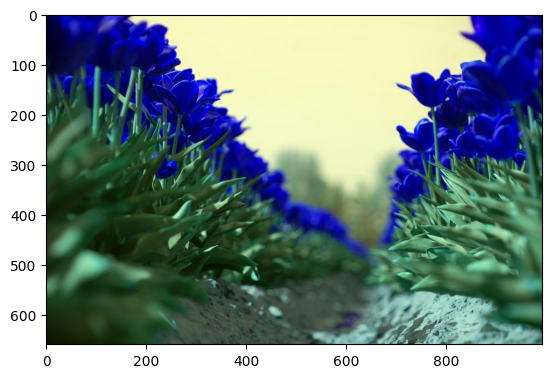

In [4]:
plt.imshow(img, vmin=0, vmax=255) # display image

The colors of the image look a bit strange, right? That's because OpenCV stores images in BGR format.
To visualize the image with matplotlib we need to convert it to default RGB first.

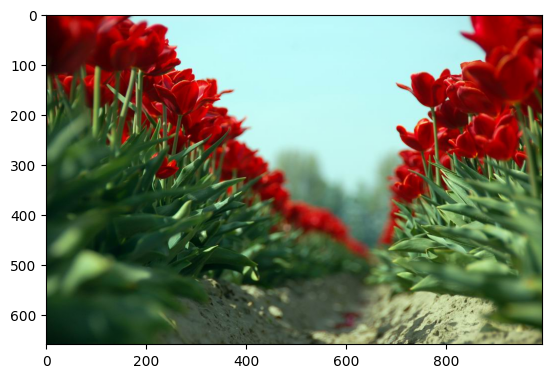

In [5]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert cv2 bgr color format to default rgb channel order
plt.imshow(rgb_img, vmin=0, vmax=255) # display image


Now you should be able to see the loaded image with correct colors.
Let's convert the image to different color spaces.

We can change the image to grayscale...

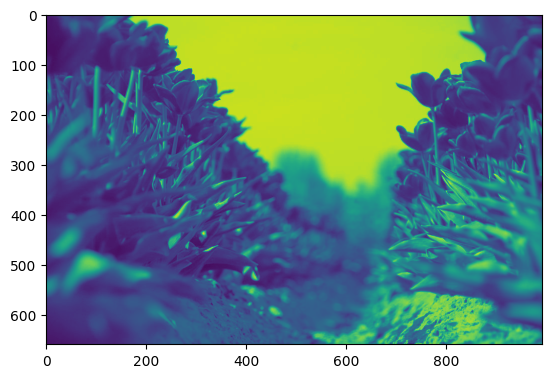

In [6]:
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY) # convert to grayscale
plt.imshow(gray_img, vmin=0, vmax=255) # display image

Hmmm, this doesn't look grayscale...
This is because `matplotlib` is applying a colormap to our image.
Therefore, we will enforce a grayscale color map.


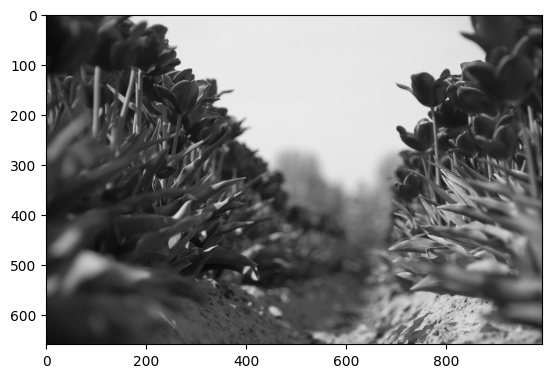

In [7]:
plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255) # display image and enforce a grayscale color map


Now it's your time. Please convert the grayscale image into a range of 0 to 1...

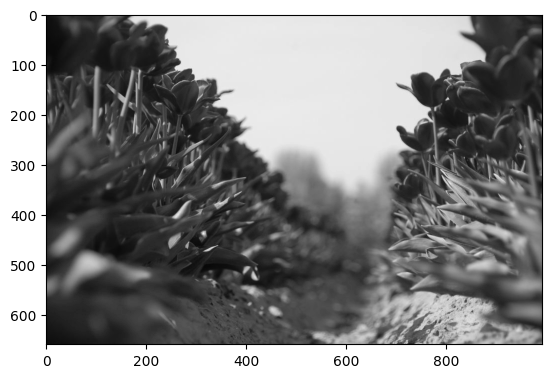

In [8]:
gray_img_range_0_to_1 = gray_img/255
plt.imshow(gray_img_range_0_to_1, cmap="gray", vmin=0, vmax=1)

Another important color space is HSV.
Next, please convert the RGB image to HSV using `cvtColor` and display the individual HSV-channels as separate images.



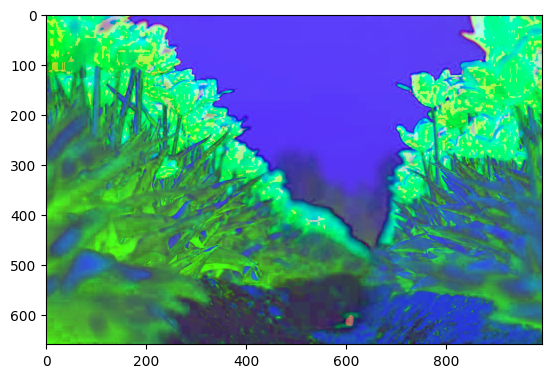

In [9]:
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img, vmin=0, vmax=255)

Visualize the individual RGB channel to see the difference.

In [10]:
print("HSV")
print(hsv_img.shape)
print(hsv_img)
print("RGB")
print(rgb_img.shape)
print(rgb_img)

HSV
(660, 993, 3)
[[[  1 252  87]
  [  1 252  87]
  [  1 255  86]
  ...
  [178 239  63]
  [179 239  63]
  [179 247  64]]

 [[  1 255  86]
  [  1 255  83]
  [  1 255  83]
  ...
  [179 239  63]
  [179 239  64]
  [  0 239  64]]

 [[  0 255  82]
  [  0 255  80]
  [  0 255  80]
  ...
  [  0 239  64]
  [  0 239  64]
  [  0 235  65]]

 ...

 [[ 77 255  21]
  [ 77 255  21]
  [ 77 255  21]
  ...
  [ 31 105 114]
  [ 31 103 116]
  [ 31  86 119]]

 [[ 77 255  21]
  [ 77 255  21]
  [ 77 255  21]
  ...
  [ 31  97 123]
  [ 31  96 125]
  [ 31  78 130]]

 [[ 77 255  21]
  [ 77 255  21]
  [ 77 255  21]
  ...
  [ 31  93 129]
  [ 31  91 131]
  [ 31  76 135]]]
RGB
(660, 993, 3)
[[[ 87   3   1]
  [ 87   3   1]
  [ 86   2   0]
  ...
  [ 63   4   8]
  [ 63   4   6]
  [ 64   2   5]]

 [[ 86   2   0]
  [ 83   2   0]
  [ 83   2   0]
  ...
  [ 63   4   6]
  [ 64   4   6]
  [ 64   4   4]]

 [[ 82   1   0]
  [ 80   0   0]
  [ 80   0   0]
  ...
  [ 64   4   4]
  [ 64   4   4]
  [ 65   5   5]]

 ...

 [[  0  21  12]


As you can see, in HSV the color is a single channel with saturation and brigtness (value) separated.
In RGB the three channels are connected.
Depending on your task/analysis it can be useful to change the colorspace of an image.

### Your own colorspace conversion
Please program your own color space conversion from RGB to HSV without using any predefined conversion methods. You can load the image with opencv, but conversions have to be implemented using numpy. Then visualize the channels like in the tasks above.

In [11]:
def computeHue(rgb_entry, min, max):
  red = rgb_entry[0]
  green = rgb_entry[1]
  blue = rgb_entry[2]
  max_min_dif = max-min
  if(min == max):
      return 0
  h = 0
  if(red == max):
      h = 60*((green-blue)/max_min_dif)
  if(green == max):
      h = 60*(2+(blue-red)/max_min_dif)
  if(red == max):
      h = 60*(4+(red-green)/max_min_dif)
  if(h < 0):
      h = h + 360
  return h

def computeSatisfaction():
  return 0

def computeValue():
  return 0

test_hsv = rgb_img[:4,:5]
print(test_hsv.shape)
print(test_hsv)
for line in test_hsv:
  for entry in line:
    max_value = max(entry)
    min_value = min(entry)
    # Compute Hue
    h = computeHue(entry, min_value, max_value)
    # Compute Satisfaction
    s = 0
    if(max_value != min_value):
      s = (max_value-min_value)/max_value
    # Compute Value
    v = max_value

    print(entry)

(4, 5, 3)
[[[87  3  1]
  [87  3  1]
  [86  2  0]
  [86  2  0]
  [84  3  0]]

 [[86  2  0]
  [83  2  0]
  [83  2  0]
  [83  2  0]
  [83  2  0]]

 [[82  1  0]
  [80  0  0]
  [80  0  0]
  [80  0  0]
  [80  0  0]]

 [[78  0  0]
  [77  0  0]
  [75  0  0]
  [74  0  0]
  [74  0  0]]]
[87  3  1]
[87  3  1]
[86  2  0]
[86  2  0]
[84  3  0]
[86  2  0]
[83  2  0]
[83  2  0]
[83  2  0]
[83  2  0]
[82  1  0]
[80  0  0]
[80  0  0]
[80  0  0]
[80  0  0]
[78  0  0]
[77  0  0]
[75  0  0]
[74  0  0]
[74  0  0]


### Histograms
We can calculate the histogram for a grayscale image or for each color channel individually. Please visualize the color histogram and equalize it with OpenCV.
Finally, display the equalized histograms and the resulting image.

### Manually adjusting contrast and brightness
Please use the flower image as grayscale.
Display it two times:
1) change the contrast
2) change the brightness

For both changes, use numpy.

### The turtle and the tulips
In this exercise please use the `turtle_mask.png`, `turtle.jpg` and the `flowers.jpg` image.
Use the `turtle_mask.png` image to create a binary mask of the `turtle.jpg` image. Then use the binary mask to add the RGB turtle into the tulips image.
The binary mask will probably contain some holes. To fix this use operations introduced during the lecture.
It should look similar to the `turtle_tulip.png` image.



In [12]:
turtle = url2img("https://github.com/bozeklab/ComputerVision_SS24/blob/main/resources/assignment_1/turtle.jpg?raw=true")
turtle_mask = url2img("https://github.com/bozeklab/ComputerVision_SS24/blob/main/resources/assignment_1/turtle_mask.png?raw=true")
flowers = url2img("https://github.com/bozeklab/ComputerVision_SS24/blob/main/resources/assignment_1/flowers.jpg?raw=true")

# Your code goes here